In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [2]:
x = pd.read_csv('cv.csv')

In [3]:
y = x['card_offered'].ravel()

In [4]:
train = x.drop(['score_affinity_spend','nbr_hist_elite_offer_extns','spend_retail','card_offered','mem_fee_24m','nbr_hist_supp_offer_extns'], axis=1)

In [5]:
x_t = train.values

# Corelation map

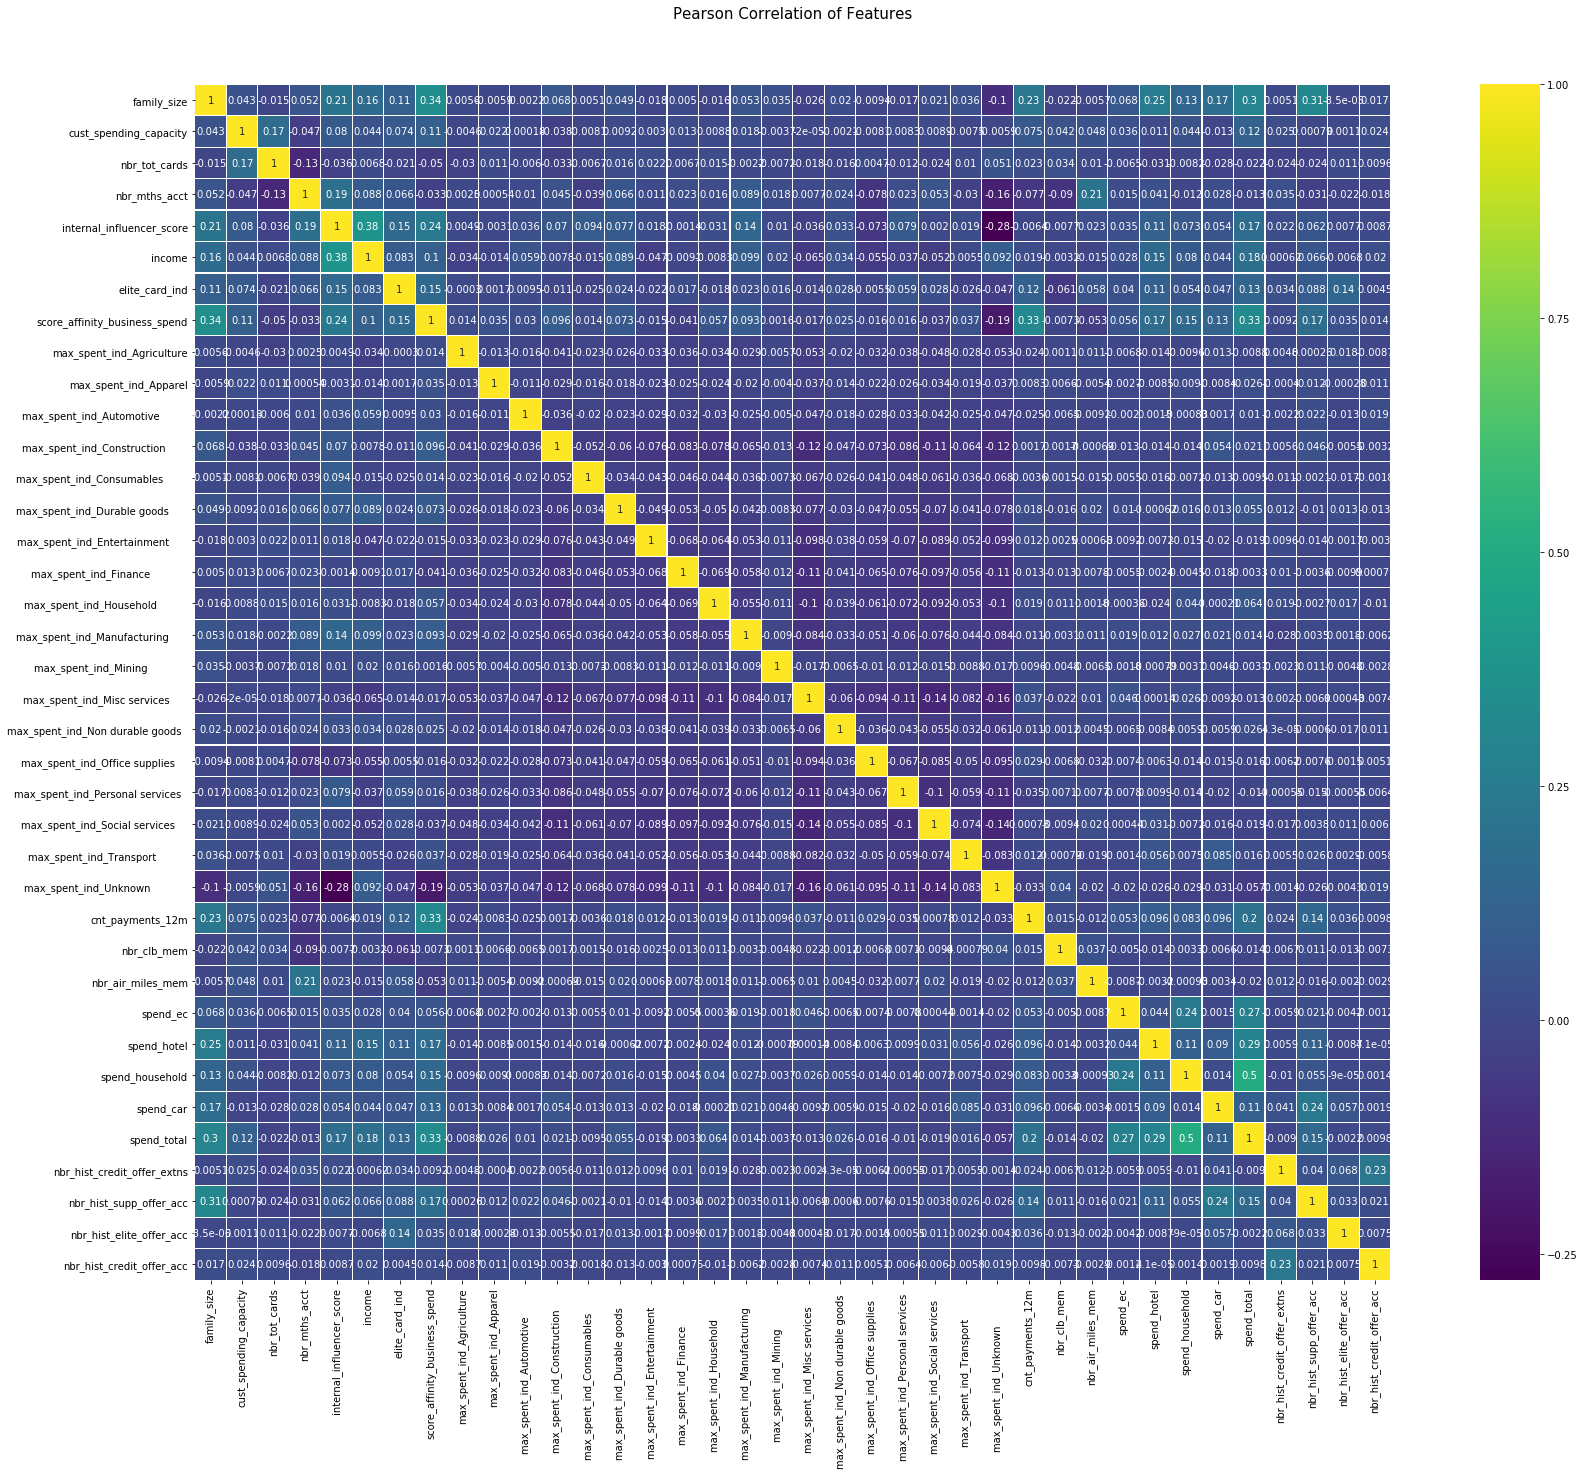

In [6]:
colormap = plt.cm.viridis
plt.figure(figsize=(32,22))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

# Stacking

In [46]:
clf1 = ExtraTreesClassifier(n_jobs=-1, n_estimators=1000,max_depth=8,min_samples_leaf=2,verbose=0)
clf2 = RandomForestClassifier(random_state=1,n_estimators=1000,n_jobs=-1,max_depth=6)
clf3 = AdaBoostClassifier(n_estimators=1500,learning_rate=0.5)
clf4 = MLPClassifier(solver='lbfgs', random_state=1, max_iter = 500, hidden_layer_sizes=(400,4), learning_rate='adaptive')
lr = GradientBoostingClassifier(learning_rate=0.1, loss='deviance', max_depth=5,n_estimators=2000,subsample=.5)
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3,clf4],
                          meta_classifier=lr)

# Calculating feature importance 

In [ ]:
rf1 = clf2.fit(x_t,y)
et1 = clf1.fit(x_t,y)
ad1 = clf3.fit(x_t,y)

In [ ]:
gd1 = lr.fit(x_t,y)

In [ ]:
rf1.feature_importances_

In [ ]:
et1.feature_importances_

In [ ]:
ad1.feature_importances_

In [ ]:
gd1.feature_importances_

In [ ]:
gd_features = [ 0.01677933,  0.0370828 ,  0.03107427,  0.08667681,  0.0259008 ,
        0.0738076 ,  0.02469757,  0.12978778,  0.00234025,  0.00141649,
        0.0020779 ,  0.00538859,  0.00331249,  0.00307976,  0.00435589,
        0.00504546,  0.00507251,  0.00312295,  0.00045598,  0.00663581,
        0.00332244,  0.00374628,  0.0049575 ,  0.00615264,  0.00357211,
        0.00807313,  0.03922539,  0.00384007,  0.0098564 ,  0.08984637,
        0.08807025,  0.08271004,  0.04228622,  0.13782732,  0.00399461,
        0.00255572,  0.00131043,  0.00054205]

In [ ]:
rf_features = [  5.43675180e-02,   1.08343371e-02,   8.52180182e-03,
         1.59272965e-01,   2.81852453e-02,   5.41341918e-02,
         4.11999879e-01,   2.55598039e-02,   4.09982390e-04,
         2.88292284e-04,   4.41147794e-04,   7.41217935e-04,
         5.14204437e-04,   8.34839092e-04,   9.77002815e-04,
         2.08248315e-03,   7.65784028e-04,   8.92824866e-04,
         8.81198262e-05,   1.01576103e-03,   6.51696346e-04,
         6.83348751e-04,   1.63764739e-03,   1.30209129e-03,
         1.02025942e-03,   4.97564023e-03,   7.11285821e-02,
         4.28142526e-03,   2.75409014e-03,   1.91400030e-02,
         2.52669866e-02,   1.39932973e-02,   2.14506298e-02,
         4.86788780e-02,   4.95820670e-03,   1.36348543e-02,
         2.16507602e-03,   3.49885512e-04]

In [ ]:
et_features = [ 0.06095158,  0.0080083 ,  0.00658164,  0.03119843,  0.02509559,
        0.0249284 ,  0.63487454,  0.02303884,  0.00067077,  0.00110259,
        0.00111393,  0.00195837,  0.00103546,  0.00175358,  0.00187655,
        0.00744621,  0.00206574,  0.00231499,  0.00077535,  0.00216312,
        0.00156874,  0.001441  ,  0.00456341,  0.00367206,  0.00323364,
        0.0054428 ,  0.05051965,  0.00624504,  0.00436683,  0.0040031 ,
        0.00578562,  0.00393304,  0.00489119,  0.01776687,  0.01182527,
        0.02489312,  0.00487047,  0.00202417]

In [ ]:
as_features = [ 0.01466667,  0.034     ,  0.01533333,  0.09266667,  0.02333333,
        0.07866667,  0.02933333,  0.12133333,  0.002     ,  0.00133333,
        0.00066667,  0.00133333,  0.002     ,  0.00333333,  0.00066667,
        0.00133333,  0.00133333,  0.002     ,  0.00066667,  0.        ,
        0.00066667,  0.        ,  0.00066667,  0.00133333,  0.00066667,
        0.00533333,  0.03466667,  0.016     ,  0.00533333,  0.06866667,
        0.10933333,  0.118     ,  0.06      ,  0.13      ,  0.006     ,
        0.00333333,  0.01066667,  0.00333333]

In [ ]:
cols = train.columns.values
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': cols,
     'Random Forest feature importances': rf_features,
     'Extra Trees  feature importances': et_features,
      'AdaBoost feature importances': as_features,
      'Gradient feature inportances': gd_features                             
    })

In [ ]:
feature_dataframe

In [ ]:
# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Random Forest feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Random Forest feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Extra Trees  feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Extra Trees  feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Extra Trees Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['AdaBoost feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['AdaBoost feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'AdaBoost Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')


# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Gradient feature inportances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Gradient feature inportances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient feature inportances',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Cross validating

In [33]:
nn1 = model_selection.cross_val_score(clf4, x_t, y, 
                                              cv=5, scoring='accuracy',n_jobs = -1)
nn1.mean()

0.30339999114556837

In [34]:
nn2 = model_selection.cross_val_score(clf1, x_t, y, 
                                              cv=5, scoring='accuracy',n_jobs = -1)
nn2.mean()

0.53119685817751772

In [35]:
nn3 = model_selection.cross_val_score(clf2, x_t, y, 
                                              cv=5, scoring='accuracy',n_jobs = -1)
nn3.mean()

0.55709971815893855

In [36]:
nn4 = model_selection.cross_val_score(clf3, x_t, y, 
                                              cv=5, scoring='accuracy',n_jobs = -1)
nn4.mean()

0.56080146818482635

In [47]:
nn5 = model_selection.cross_val_score(sclf, x_t, y, 
                                              cv=5, scoring='accuracy',n_jobs = -1) #Stacking model CV calculation
nn5.mean()

0.54369971320645982

# Ensembling

In [48]:
from mlxtend.classifier import EnsembleVoteClassifier
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3, clf4, lr], weights=[1,1,1.2,0.5,1.5])

In [ ]:
es = model_selection.cross_val_score(eclf, x_t, y, 
                                              cv=5, scoring='accuracy',n_jobs = -1) #Ensemble model CV Calculation

In [51]:
es.mean()

0.56600072051061556

# Fitting the model

In [ ]:
model1 = sclf.fit(x_t,y)

In [ ]:
t = pd.read_csv("cv1.csv")
t = t.drop(['score_affinity_spend','nbr_hist_elite_offer_extns','spend_retail','mem_fee_24m','nbr_hist_supp_offer_extns'], axis=1)
tA = t.values
predictsA=model1.predict(tA)
i1 = pd.DataFrame({ 'card_offered': predictsA })

In [ ]:
i1.card_offered.value_counts()

In [ ]:
i1.to_csv("S1.csv", index=False)

In [ ]:
t1 = pd.read_csv("cv1.csv")
t1 = t1.drop(['score_affinity_spend','nbr_hist_elite_offer_extns','spend_retail','mem_fee_24m','nbr_hist_supp_offer_extns'], axis=1)
tB = t1.values
predictsB=model1.predict(tB)
i2 = pd.DataFrame({ 'card_offered': predictsB })

In [ ]:
i2.to_csv("S2.csv", index=False)

# Second Go

In [ ]:
t11 = pd.read_csv("t1.csv")
t12 = pd.read_csv("t2.csv")
t11 = t11.drop(['score_affinity_spend','nbr_hist_elite_offer_extns','spend_retail'], axis=1)
t12 = t12.drop(['score_affinity_spend','nbr_hist_elite_offer_extns','spend_retail'], axis=1)

In [ ]:
testA = t11.values
testB = t12.values

In [ ]:
tr = pd.read_csv("trainfinal.csv")

In [ ]:
yr = tr['card_accepted'].ravel()

In [ ]:
af = tr.drop(['card_accepted','score_affinity_spend','nbr_hist_elite_offer_extns','spend_retail'],axis=1)

In [ ]:
xr = af.values

# Cross validation

In [ ]:
print('5 fold cross validation:\n')

for clfA, label in zip([clf1, clf2, clf3, sclf], 
                      ['Extra Trees', 
                       'Random Forest', 
                       'ADA Boost',
                       'StackingClassifier']):
    scores = model_selection.cross_val_score(clfA, xr, yr, 
                                              cv=5, scoring='accuracy',n_jobs=-1)

In [ ]:
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

In [ ]:
scores.view()

# Fitting the model

In [ ]:
model = sclf.fit(xr, yr)

In [ ]:
predictsA1 = model.predict(testA)
i11 = pd.DataFrame({ 'card_offered': predictsA1 })
i11.to_csv("sub1.csv", index=False)

In [ ]:
i11.card_offered.value_counts()

In [ ]:
predictsB1=model.predict(testB)
i12 = pd.DataFrame({ 'card_offered': predictsB1 })
i12.to_csv("sub2.csv", index=False)